# Stochastic Discount Factor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Stimulate Consumption Growth

In [3]:
#randomly generate epsilon and nu

epsilon = []
nu = []
mu = 0.02
sigma = 0.02
def monte_carlo(times):
    for i in range(times):
        epsilon.append(np.random.standard_normal())
        x = np.random.uniform()
        if x < 0.017:
            nu.append(np.log(0.65))
        else: nu.append(0)
    random_variables = pd.DataFrame([epsilon, nu], index = ['$\tilde ε$', '$\tilde ν$']).T
    random_variables['$ln\tilde g$'] = mu + sigma * random_variables['$\tilde ε$'] + random_variables['$\tilde ν$']
    return random_variables

In [4]:
monte_carlo(10000)

,$\tilde ε$,$\tilde ν$,$ln\tilde g$
0,-0.103517,0.0,0.017930
1,1.198315,0.0,0.043966
2,0.645910,0.0,0.032918
3,-0.024971,0.0,0.019501
4,0.781832,0.0,0.035637
...,...,...,...
9995,1.599593,0.0,0.051992
9996,0.910901,0.0,0.038218
9997,0.109346,0.0,0.022187
9998,-1.270979,0.0,-0.005420


### Stimulate Pricing Kernal for Each γ

In [5]:
gammas = np.arange(1, 4.1, 0.1)
standard_deviation = pd.DataFrame(index = ['$σ_{m}/μ_{m}$'])

In [6]:
def stimulate(times):
    standard_deviation = pd.DataFrame(index = ['$σ_{m}/μ_{m}$'])
    for gamma in gammas:
        COL = round(gamma, 1)
        pricing_kernal = 0.99 * np.exp(monte_carlo(times)['$ln\tilde g$'])**(-gamma)
        mean = pricing_kernal.mean()
        std = pricing_kernal.std()
        standard_deviation[COL] = std/mean
    return standard_deviation.T

In [7]:
standard_deviation = stimulate(10)
standard_deviation.head()

,$σ_{m}/μ_{m}$
1.0,0.069671
1.1,0.078180
1.2,0.087017
1.3,0.096410
1.4,0.105966


In [8]:
smallest_γ = standard_deviation[standard_deviation > 0.4].dropna().iloc[0,:].rename(index = {'$σ_{m}/μ_{m}$': 'σm/μm'})
smallest_γ

σm/μm    0.404305
Name: 3.4, dtype: float64

### Visualization 

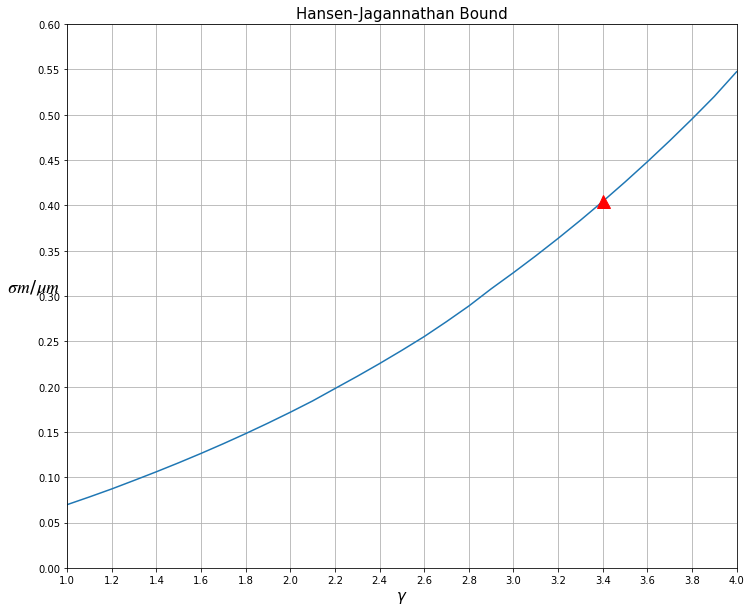

In [9]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize = (12, 10))
plt.plot(standard_deviation)
plt.plot(smallest_γ.name, smallest_γ[0], color = 'r', marker = '^', markersize = 13)
#plt.axhline(y = 0.4, color = 'r', linestyle = '--')
plt.xlabel('$γ$', fontsize = 15)
plt.ylabel('$𝜎𝑚/𝜇𝑚$', fontsize = 18, position = (-10, 0.5), rotation = 0)
plt.yticks(rotation = 360)
x_major_locator=MultipleLocator(0.2)
y_major_locator=MultipleLocator(0.05)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(1, 4)
plt.ylim(0, 0.6)
plt.title('Hansen-Jagannathan Bound', fontsize = 15)
plt.grid()
plt.show()

### Economic Significance
- US stock market has Sharpe ratio of 0.4, which can be used to derive lower bound on (constant) coefficient of relative risk aversion for investor with power utility (of consumption). By applying the CRRA utility function, assuming the consumption growth follows lognormal distribution, and taking the effect of rare disasters into account, Hansen-Jagannathan bound is satisfied for **`γ = 3.4`**, which is reasonably small for low level of relative risk aversion. For γ = 3.4, **`σ𝑚/μ𝑚 ≈ 0.41`**, which is approximately consistent with the Sharp ratio of the U.S stock market.


- For γ >= 3.4, the standard deviation of the pricing kernel must exceed the Sharp ratio of any asset of the portfolios that can be traded in the financial market. In other words, it must exceed the Sharp ratio of the portfolio with the highest Sharp ratio.


- Distribution of consumption growth becomes highly skewed (to the left) when rare disasters are included.


- The volatility of the pricing kernal should be greater than Hansen-Jagannathan bound, which is the absolute value of Sharp ratio of any asset of the portfolio and represents the lower bound of the volatility of the pricing kernal. 


- H–J bound is satisfied for reasonably low level of relative risk aversion, so no equity premium puzzle. 